In [8]:
# import os
# import random
# import shutil
# import tensorflow as tf
# from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping
#
# # 1. Pfade für Bilddaten (Pferde & Einhörner)
# horse_images_path = "D:\MLDL\data\horse"
# unicorn_images_path = "D:\MLDL\data\\unicorn"
#
# # Verzeichnisstruktur für Training & Validierung
# base_dir = "combined_dataset"
# dirs = {"train/horse", "train/unicorn", "validation/horse", "validation/unicorn"}
# for d in dirs:
#     os.makedirs(os.path.join(base_dir, d), exist_ok=True)
#
# # Funktion zum Verteilen der Bilder (50% Pferde, 50% Einhörner, 75% Train, 25% Validation)
# def balanced_copy_images(src_horse, src_unicorn, base_dir, train_split=0.75):
#     horse_images = sorted([f for f in os.listdir(src_horse) if f.endswith(('.png'))])
#     unicorn_images = sorted([f for f in os.listdir(src_unicorn) if f.endswith(('.png'))])
#
#     min_count = min(len(horse_images), len(unicorn_images))
#     train_count = int(min_count * train_split)
#
#     for category, images, train_dir, val_dir in [("horse", horse_images, "train/horse", "validation/horse"),
#                                                  ("unicorn", unicorn_images, "train/unicorn", "validation/unicorn")]:
#         random.shuffle(images)
#         for img in images[:train_count]:
#             shutil.copy(os.path.join(locals()[f"src_{category}"], img), os.path.join(base_dir, train_dir, img))
#         for img in images[train_count:min_count]:
#             shutil.copy(os.path.join(locals()[f"src_{category}"], img), os.path.join(base_dir, val_dir, img))
#
#     print(f"Trainingsbilder: {train_count} pro Kategorie")
#     print(f"Validierungsbilder: {min_count - train_count} pro Kategorie")
#
# # Bilder kopieren und aufteilen
# balanced_copy_images(horse_images_path, unicorn_images_path, base_dir)
#
# # Bildverarbeitung mit einheitlicher Auflösung
# image_size = (224, 224)
# batch_size = 32
#
# train_datagen = ImageDataGenerator(rescale=1.0/255)
# val_datagen = ImageDataGenerator(rescale=1.0/255)
#
# train_generator = train_datagen.flow_from_directory(
#     os.path.join(base_dir, "train"),
#     target_size=image_size,
#     batch_size=batch_size,
#     class_mode="binary"
# )
#
# validation_generator = val_datagen.flow_from_directory(
#     os.path.join(base_dir, "validation"),
#     target_size=image_size,
#     batch_size=batch_size,
#     class_mode="binary"
# )
#
# # Vortrainiertes ResNet50 Modell laden
# base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3))
#
# # ResNet50 einfrieren
# for layer in base_model.layers:
#     layer.trainable = False
#
# # Klassifikationskopf für Pferde vs. Einhörner
# model = Sequential([
#     base_model,
#     GlobalAveragePooling2D(),
#     Dense(256, activation="relu"),
#     Dropout(0.5),
#     Dense(1, activation="relu")
# ])
#
# # Modell kompilieren
# model.compile(optimizer=Adam(learning_rate=0.00005),
#               loss="binary_crossentropy",
#               metrics=["accuracy"])
#
# # EarlyStopping für besseres Training
# early_stopping = EarlyStopping(monitor="val_accuracy", patience=3, restore_best_weights=True)
#
# # Modell trainieren
# history = model.fit(
#     train_generator,
#     epochs=20,
#     validation_data=validation_generator,
#     callbacks=[early_stopping]
# )
#
# # Modell speichern
# model.save("unicorn_vs_horse_resnet50.h5")
#
# # Testgenauigkeit auswerten
# test_loss, test_acc = model.evaluate(validation_generator)
# print(f"Testgenauigkeit: {test_acc:.2f}")

Trainingsbilder: 160 pro Kategorie
Validierungsbilder: 54 pro Kategorie
Found 428 images belonging to 2 classes.
Found 363 images belonging to 2 classes.
Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 13s 743ms/step - accuracy: 0.5089 - loss: 4.8654 - val_accuracy: 0.4711 - val_loss: 0.6713
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 669ms/step - accuracy: 0.4769 - loss: 5.3018 - val_accuracy: 0.6474 - val_loss: 0.6436
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 657ms/step - accuracy: 0.4988 - loss: 4.6230 - val_accuracy: 0.5565 - val_loss: 0.7286
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 659ms/step - accuracy: 0.4873 - loss: 4.6754 - val_accuracy: 0.6391 - val_loss: 0.6385
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 655ms/step - accuracy: 0.5289 - loss: 3.7763 - val_accuracy: 0.6501 - val_loss: 0.6109
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 663ms/step - accuracy: 0.5060 - loss: 4.2632 - val_accuracy: 0.6860 - val_loss: 0.6064
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 659ms/step - accuracy: 0.5188 - loss

12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 347ms/step - accuracy: 0.7036 - loss: 0.6040
Testgenauigkeit: 0.69


In [9]:
import pathlib

data_dir = pathlib.Path('data')
print(f"Corrected data directory: {data_dir}")

if data_dir.exists():
    print("Directory exists")
else:
    print("Directory does not exist")

all_files = list(data_dir.glob('**/*'))
print(f"Total files found: {len(all_files)}")

print("First few files:")
for file in all_files[:5]:
    print(file)

image_files = list(data_dir.glob('**/*.png'))
image_count = len(image_files)
print(f"Total image files found: {image_count}")

Corrected data directory: data
Directory exists
Total files found: 430
First few files:
data\horse
data\unicorn
data\horse\01_001.png
data\horse\01_002.png
data\horse\01_003.png
Total image files found: 428


In [15]:
image_files = list(data_dir.glob('*/*.png'))
image_count = len(image_files)
print(image_count)

428


In [16]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


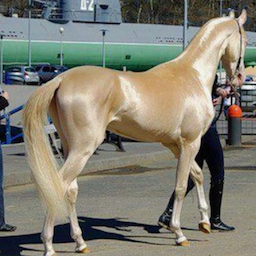

In [13]:
horses = list(data_dir.glob('horse/*'))
PIL.Image.open(str(horses[0]))

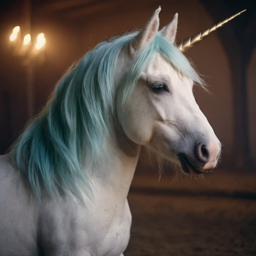

In [14]:
unicorns = list(data_dir.glob('unicorn/*'))
PIL.Image.open(str(unicorns[0]))

In [17]:
batch_size = 16

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=image_size,
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=image_size,
  batch_size=batch_size)

Found 428 files belonging to 2 classes.
Using 343 files for training.
Found 428 files belonging to 2 classes.
Using 85 files for validation.


In [18]:
class_names = train_ds.class_names
print(class_names)

['horse', 'unicorn']


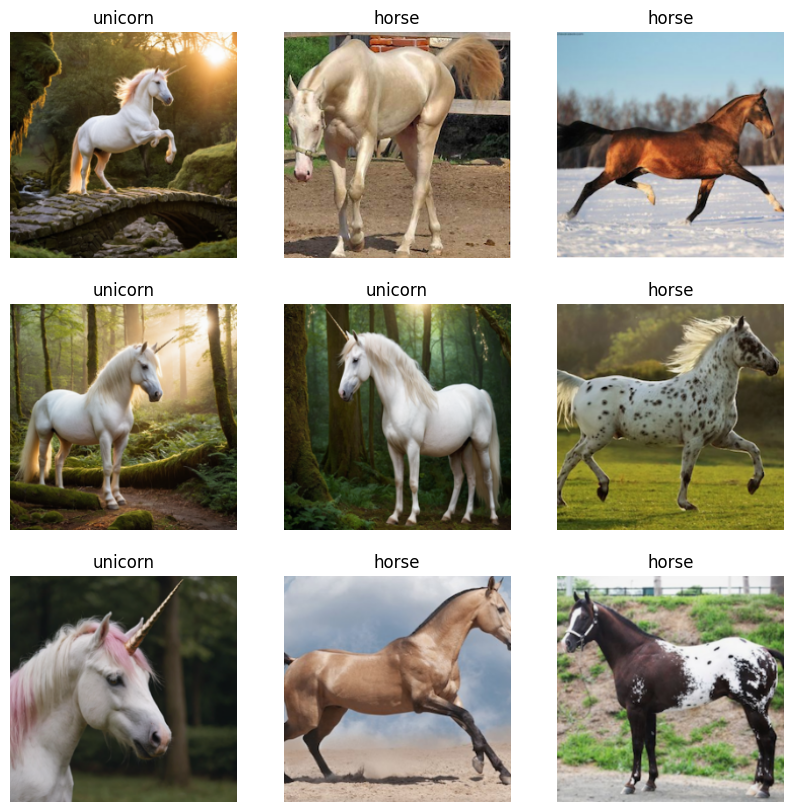

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [20]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(16, 224, 224, 3)
(16,)


In [22]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
normalization_layer = layers.Rescaling(1. / 255)
num_classes = len(class_names)

In [29]:
model = Sequential([
    base_model,
    layers.Dense(256, activation='relu'),
    layers.Dense(1)
])

In [30]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 7, 7, 256)      │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 7, 7, 1)        │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,112,513 (91.98 MB)

 Trainable params: 524,801 (2.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [33]:
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import ResNet50

# Vortrainiertes ResNet50 Modell laden
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# ResNet50 einfrieren
for layer in base_model.layers:
    layer.trainable = False

# Klassifikationskopf für Pferde vs. Einhörner
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")  # Use sigmoid activation for binary classification
])

# Modell kompilieren
model.compile(optimizer=Adam(learning_rate=0.00005),
              loss="binary_crossentropy",
              metrics=["accuracy"])

epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)



Epoch 1/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 309ms/step - accuracy: 0.5102 - loss: 0.8806 - val_accuracy: 0.9412 - val_loss: 0.3428
Epoch 2/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 248ms/step - accuracy: 0.8738 - loss: 0.3477 - val_accuracy: 0.9882 - val_loss: 0.1621
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 249ms/step - accuracy: 0.9729 - loss: 0.1653 - val_accuracy: 0.9882 - val_loss: 0.0988
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 254ms/step - accuracy: 0.9785 - loss: 0.1079 - val_accuracy: 0.9882 - val_loss: 0.0707
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 247ms/step - accuracy: 0.9850 - loss: 0.0876 - val_accuracy: 0.9882 - val_loss: 0.0501
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 251ms/step - accuracy: 0.9956 - loss: 0.0657 - val_accuracy: 0.9882 - val_loss: 0.0402
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 249ms/step - accuracy: 1.0000 - loss: 0.0414 - val_accuracy: 0.9882 - val_loss: 0.0353
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 256ms/step - accuracy: 0.9952 - loss: 0.0490 - val_accuracy: 0

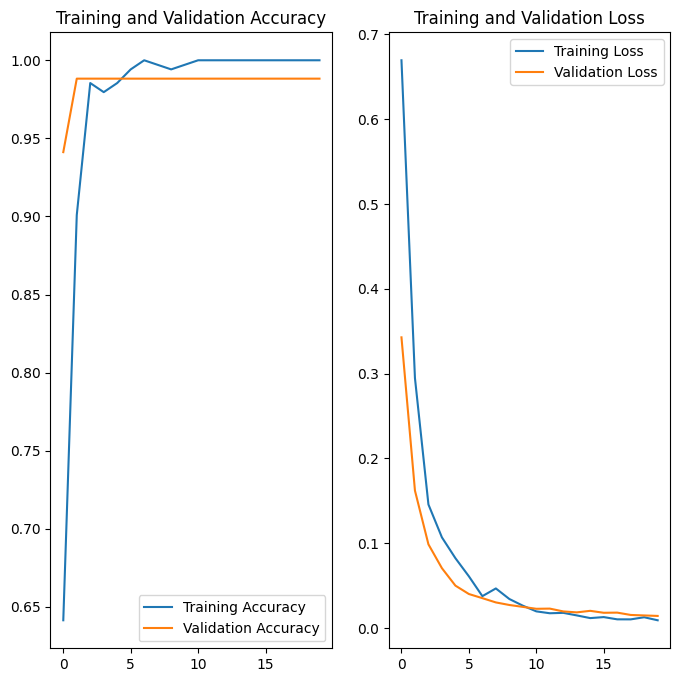

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [36]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal", input_shape=(image_size[0], image_size[1], 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
    layers.RandomBrightness(0.1),
  ]
)

In [40]:
model = Sequential([
    data_augmentation,
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")  # Use sigmoid activation for binary classification
])

In [43]:
# # Compile the model with a learning rate scheduler
# initial_learning_rate = 0.001
# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True)
#
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])


# Modell kompilieren
model.compile(optimizer=Adam(learning_rate=0.00005),
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [44]:
# Train the model for more epochs
epochs = 18
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/18
22/22 ━━━━━━━━━━━━━━━━━━━━ 11s 307ms/step - accuracy: 0.5326 - loss: 0.7801 - val_accuracy: 0.9412 - val_loss: 0.3369
Epoch 2/18
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 262ms/step - accuracy: 0.8465 - loss: 0.3486 - val_accuracy: 0.9882 - val_loss: 0.1726
Epoch 3/18
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 257ms/step - accuracy: 0.9418 - loss: 0.1963 - val_accuracy: 1.0000 - val_loss: 0.1126
Epoch 4/18
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 260ms/step - accuracy: 0.9753 - loss: 0.1286 - val_accuracy: 1.0000 - val_loss: 0.0856
Epoch 5/18
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 257ms/step - accuracy: 0.9955 - loss: 0.0804 - val_accuracy: 1.0000 - val_loss: 0.0739
Epoch 6/18
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 257ms/step - accuracy: 1.0000 - loss: 0.0655 - val_accuracy: 1.0000 - val_loss: 0.0625
Epoch 7/18
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 269ms/step - accuracy: 0.9963 - loss: 0.0573 - val_accuracy: 1.0000 - val_loss: 0.0530
Epoch 8/18
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 255ms/step - accuracy: 0.9867 - loss: 0.0517 - val_accuracy: 1

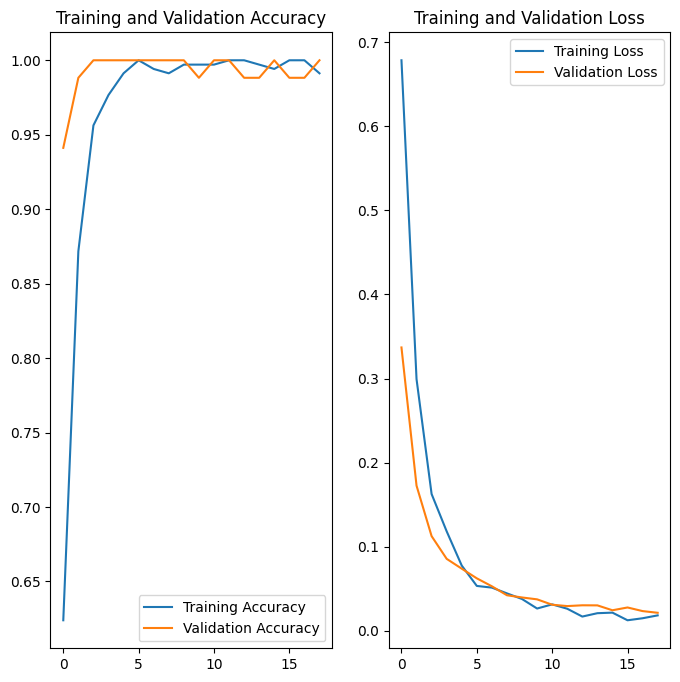

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()